In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# 데이터 로드
data = pd.read_csv('/content/drive/MyDrive/MY Drive/boston_housing.csv')
X = data.iloc[:, :-1].values
y = data['medv'].values



In [ ]:
# 데이터 분할
X_train = X[:400]
y_train = y[:400]
X_test = X[400:]
y_test = y[400:]


In [ ]:
# 표준화
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [ ]:
def hypothesis(X, w, b):
    return X.dot(w) + b

def MSE(y_pred, y_true):
    err = (y_pred - y_true) ** 2
    return np.mean(err)


In [ ]:
# 초기값 설정
w = np.random.rand(X_train.shape[1])
b = np.random.rand()



In [ ]:
# 경사하강법
epoch = 2000
alpha = 1e-2
total_loss = []


In [ ]:
for i in range(epoch):
    h = hypothesis(X_train, w, b)
    loss = MSE(h, y_train)
    for j in range(X_train.shape[1]):
        grad = np.mean((h - y_train) * X_train[:, j])
        w[j] -= alpha * grad
    b -= alpha * np.mean(h - y_train)
    total_loss.append(loss)


In [ ]:
# 예측
y_pred = hypothesis(X_test, w, b)


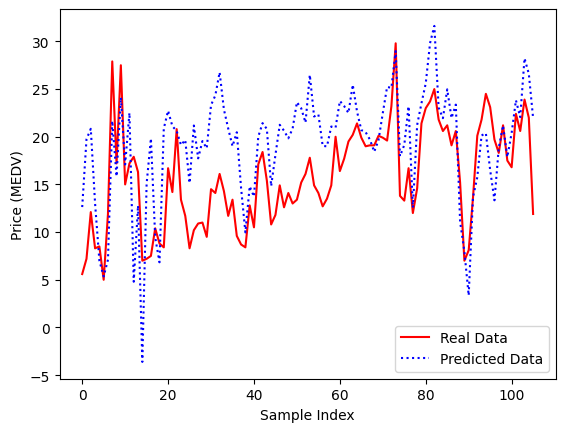

In [ ]:
# 결과 시각화
plt.plot(y_test, 'r', linestyle='solid', label='Real Data') # 실제 값
plt.plot(y_pred, 'b', linestyle='dotted', label='Predicted Data') # 예측 값
plt.xlabel('Sample Index')
plt.ylabel('Price (MEDV)')
plt.legend()
plt.show()